# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.


### Part Three

Make presentation and send your vdo clip to presentation










## Import Libraries




In [ ]:
!pip install sweetviz 
#uncomment the above if you need to install the library 
!pip install auto-sklearn
#uncomment the above if you need to install the library 

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autosklearn.classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

### Sweetviz

In [ ]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


In [ ]:
# Anwer 1 : Here are number of records, fields and their data types of train data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Anwer 1 : Here are number of records, fields and their data types of test data.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# Anwer 2 : Check missing values and duplicates both train and test data
print(train.isna().sum())
print(test.isna().sum())
print(df.duplicated().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
0


In [ ]:
# Anwers 3 : Distrubition
train.groupby(['Loan_Status'])['Loan_Status'].count()

Loan_Status
N    192
Y    422
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.metrics.pairwise import normalize
# Anwers 3 : Distrubition
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

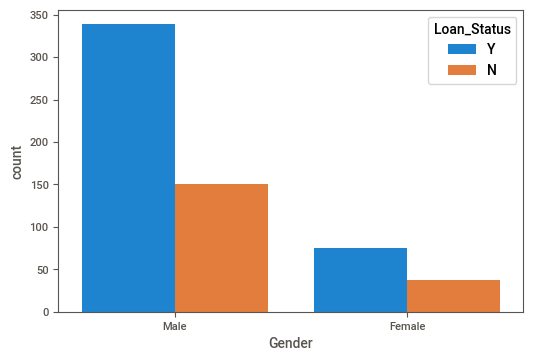

In [ ]:
# Anwers 4 : Women and men compare when it comes to defaulting on loans
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

In [ ]:
# Anwers 4 : Women and men compare when it comes to defaulting on loans
F_n = train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()[0]
F_y = train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()[1]
M_n = train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()[2]
M_y = train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()[3]
F_y_pct = F_y/(F_n + F_y)*100
M_y_pct = M_y/(M_n + M_y)*100
print(f"Female comes to defaulting : {round(F_y_pct)}%")
print(f"Male comes to defaulting : {round(M_y_pct)}%")

Female comes to defaulting : 67%
Male comes to defaulting : 69%


In [ ]:
# Anwers 4 : Women and men compare when it comes to defaulting on loans
train.groupby(['Gender'])['Loan_Status'].value_counts(normalize=True)


Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

In [ ]:
# Anwer 5 : How many of the loan applicants have dependents based on the historical dataset?
df[(df['Dependents'] != '0')]['Dependents'].count()

206

In [ ]:
# Anwer 5 : How many of the loan applicants have dependents based on the historical dataset?
train[train['Dependents'] != '0'].shape[0]

269

In [ ]:
train[train['Dependents'] != '0'].shape[0]/train.shape[0]

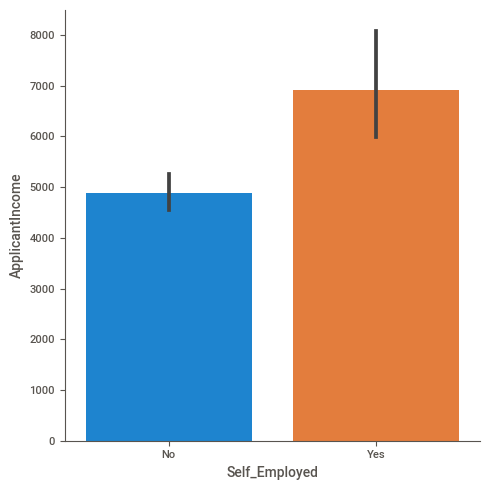

In [ ]:
# Anwer 6 : Plot Self_Employed income
sns.catplot(data=df,x="Self_Employed",y="ApplicantIncome",kind="bar")

In [ ]:
# Anwer 6 : Cal Self_Employed income
Self_income = round(df[(df['Self_Employed'] == 'Yes')]['ApplicantIncome'].mean())
Em_income = round(df[(df['Self_Employed'] == 'No')]['ApplicantIncome'].mean())
print(f"Average Self employed income is : {Self_income}\nAverage Employed income is : {Em_income}")

Average Self employed income is : 6913
Average Employed income is : 4892


In [ ]:
# Question 6
train.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


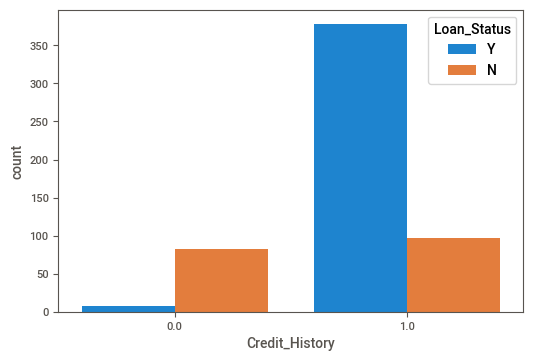

In [ ]:
# Anwer 7 : Are applicants with a credit history more likely to default than those who do not have one?
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])

In [ ]:
# Question 7
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

In [ ]:
# Anwer 8 : Correlation between the applicant's income and the loan amount
df['ApplicantIncome'].corr(df['LoanAmount'])

0.5518108565650457

In [ ]:
# Question 8
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


## Your anwers:

1. Anwers above

2. Anwers above, Missing value in some rows bot no duplicated data.

3. Compare by frequency of "Y" and "N". 192 for "N" and 422 for "Y"

4. Female comes to defaulting : 67%, Male comes to defaulting : 69%
 
5. The loan applicants have dependents are 411 applicants.

6. Average Self employed income is : 6913, Average Employed income is : 4892

7. Applicants with a credit history more likely to default than those who do not have one.

8. Correlation between the applicant's income and the loan amount : 0.55



# Part Two

## Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7967479674796748


In [ ]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  1]
 [24 79]]


## Bespoke ML sklearn

### Data Preparation

In [ ]:
# Matrix of features

### Handle Missing Values Here ###
df = train.dropna()

### Include Numerical Features Here ###
X = df[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

### Scale Here ###
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = df['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(X, columns=X.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

In [ ]:
# train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #change model to RandomForest
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.8125


In [ ]:
print(confusion_matrix(predictions_clf, y_test))

[[12  2]
 [16 66]]


# Part Three

In [ ]:
df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


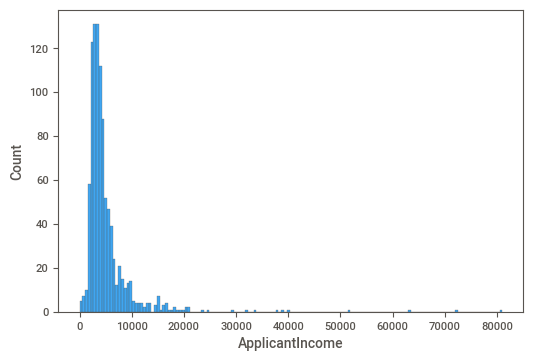

In [ ]:
sns.histplot(df['ApplicantIncome'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


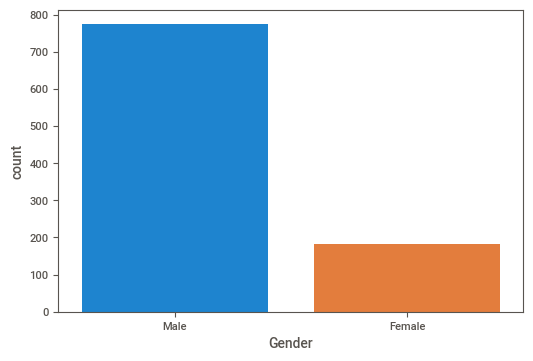

In [ ]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


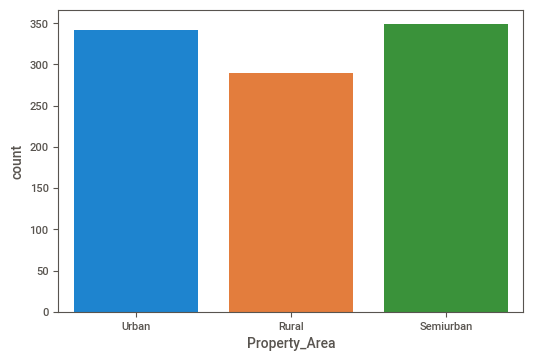

In [ ]:
sns.countplot(df['Property_Area'])

In [ ]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [ ]:
# Matrix of features

# imputing the missing values:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Status'].fillna(train['Loan_Status'].mode()[0], inplace = True)

# encoding categorical features
train['Gender'] = train['Gender'].map({'Male':0,'Female':1}).astype(int)
train['Married'] = train['Married'].map({'No':0,'Yes':1}).astype(int)
train['Education'] = train['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
train['Credit_History'] = train['Credit_History'].astype(int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace = True)



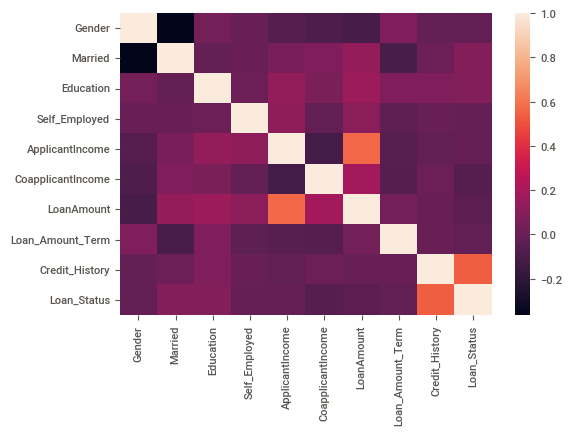

In [ ]:
sns.heatmap(train.corr())